The following code studies the output-weighted measure and can be used to replicate **Supplementary Fig. 8**.

In [1]:
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

from optint.data import synthetic_instance, gen_dag
from optint.run import run
from optint.visualize import *

import warnings
warnings.filterwarnings('ignore')

### Generate synthetic instances

In [2]:
seed = 1234
np.random.seed(seed)

# generate problem instantiation
nnodes = 10
sigma_square = np.ones(nnodes)
DAG_type = 'complete'

num_instances = 10
a_size = 5

problems = []
graph = gen_dag(nnodes=nnodes, DAG_type=DAG_type)
for _ in range(num_instances):
	problem = synthetic_instance(
		nnodes=nnodes, 
		DAG_type=DAG_type,
		std=True,
		sigma_square=sigma_square, 
		a_size=a_size,
		a_target_nodes=[i+nnodes//2 for i in range(a_size)], 
		prefix_DAG=graph
		)
	problems.append(problem)

there are no undirected edges
plotting...


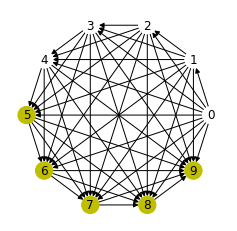

In [3]:
draw(
	problem.DAG, 
	colored_set = set(i for i in range(problem.nnodes) if problem.a_target[i]!=0), 
	affected_set=set().union(*[problem.DAG.descendants_of(i) for i in range(problem.nnodes) if problem.a_target[i]!=0]),
	)

### Run 5 methods

In [4]:
# options for testing
opts = Namespace(n=1, T=50, W=0, R=20, time=True)

In [5]:
acqs = ['greedy', 'maxv','cv', 'civ', 'civ', 'ei', 'mi', 'ucb']
measure = [None, None, None, 'unif', 'ow', None, None, None]
known_variance = [False, True, True, True, True, False, True, True]
name = ['greedy', 'maxv', 'cv', 'civ', 'civow', 'ei', 'mi', 'ucb']


MSEs = []
As = []
Probs = []
Times = []
for i in range(num_instances):
    problem = problems[i]

    A = {}
    Prob = {}
    Time = {}

    opts.active = False
    A['passive'], Prob['passive'], Time['passive'] = run(problem, opts)

    opts.active = True
    for a in range(len(acqs)):
        opts.acq = acqs[a]
        opts.measure = measure[a]
        opts.known_noise = known_variance[a]
        A[name[a]], Prob[name[a]], Time[name[a]]  = run(problem, opts)

    print(f'Graph {i+1}')

    As.append(A)
    Probs.append(Prob)
    Times.append(Time)

  0%|                                                                                                       | 0/20 [00:00<?, ?it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 10%|█████████▌                                                                                     | 2/20 [00:01<00:15,  1.18it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 40%|██████████████████████████████████████                                                         | 8/20 [00:06<00:08,  1.37it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]


Graph 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


Graph 2


  5%|████▊                                                                                          | 1/20 [00:00<00:12,  1.48it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 20%|███████████████████                                                                            | 4/20 [00:02<00:11,  1.35it/s]

Optimization fails...
Inequality constraints incompatible
2nd initialization (estimate) failed...


 35%|█████████████████████████████████▎                                                             | 7/20 [00:05<00:10,  1.19it/s]

Optimization fails...
Iteration limit reached


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


Graph 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]


Graph 4


  5%|████▊                                                                                          | 1/20 [00:00<00:12,  1.49it/s]

Optimization fails...
Inequality constraints incompatible
1st initialization (last round) failed...


 55%|███████████████████████████████████████████████████▋                                          | 11/20 [00:08<00:07,  1.27it/s]

Optimization fails...
Iteration limit reached
1st initialization (last round) failed...


 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 19/20 [00:14<00:00,  1.31it/s]

Optimization fails...
Iteration limit reached
1st initialization (last round) failed...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


Graph 5


 40%|██████████████████████████████████████                                                         | 8/20 [00:05<00:08,  1.43it/s]

Optimization fails...
Iteration limit reached
1st initialization (last round) failed...


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 17/20 [00:11<00:02,  1.41it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 18/20 [00:12<00:01,  1.41it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.27it/s]


Graph 6


 50%|███████████████████████████████████████████████                                               | 10/20 [00:07<00:07,  1.38it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 16/20 [00:12<00:03,  1.15it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


Graph 7


 20%|███████████████████                                                                            | 4/20 [00:03<00:12,  1.25it/s]

Optimization fails...
Iteration limit reached
Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 80%|███████████████████████████████████████████████████████████████████████████▏                  | 16/20 [00:12<00:02,  1.35it/s]

Optimization fails...
Iteration limit reached
2nd initialization (estimate) failed...


 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 18/20 [00:14<00:01,  1.32it/s]

Optimization fails...
Iteration limit reached
1st initialization (last round) failed...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.25it/s]


Graph 8


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 17/20 [00:13<00:02,  1.22it/s]

Optimization fails...
Iteration limit reached


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]


Graph 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]

Graph 10


### Plot results

<Figure size 432x288 with 0 Axes>

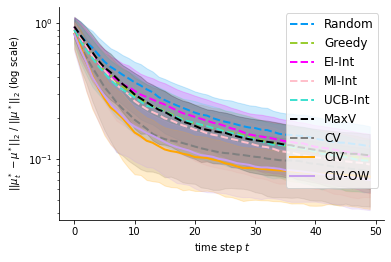

In [6]:
mu_MSEs = []
for i in range(num_instances):
	Prob = Probs[i]
	problem = problems[i]
	mu_mses = {k:[] for k in ['passive', 'greedy', 'maxv', 'cv', 'civ', 'civow', 'ei', 'mi','ucb']}
	for r in range(opts.R):
		for k in ['passive', 'greedy', 'maxv', 'cv', 'civ', 'civow', 'ei', 'mi', 'ucb']:
			mse = []
			for prob in Prob[k][r]:
				errs = abs(np.dot(problem.A,np.dot(np.eye(problem.nnodes)-np.array(prob['mean']),problem.mu_target)) - problem.mu_target)
				mse.append(np.linalg.norm(np.concatenate(errs)) / np.linalg.norm(problem.mu_target))
			mu_mses[k].append(mse)
	mu_MSEs.append(mu_mses)

plt.clf()
fig, ax = plt.subplots(1,1,figsize=(5.6,3.8))
plt.rcParams.update({'font.size': 12})

plt.yscale('log')

labels = ['Random', 'Greedy', 'EI-Int', 'MI-Int', 'UCB-Int', 'MaxV', 'CV', 'CIV', 'CIV-OW']
colors = ['#069AF3', '#9ACD32', 'magenta','pink', 'turquoise', 'black', 'grey', 'orange', '#C79FEF']
markers = ['^', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's']
linestyles = ['--','--', '--', '--','--','--', '--','-', '-']
for i, k in enumerate(['passive', 'greedy', 'ei', 'mi', 'ucb', 'maxv', 'cv', 'civ', 'civow']):
	mean = np.array([np.array(mu_MSEs[i][k]).mean(axis=0) for i in range(num_instances)]).mean(axis=0)
	std = np.array([np.array(mu_MSEs[i][k]).std(axis=0) for i in range(num_instances)]).mean(axis=0)
	plt.plot(range(opts.T), mean, label=labels[i], linewidth=2, color=colors[i], marker=markers[i], markersize=0, linestyle=linestyles[i])
	plt.fill_between(range(opts.T), mean - std, mean + std, alpha=.2, color=colors[i])

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# plt.ylim(0.01,1)

plt.legend(loc='upper right')
plt.xlabel(r'time step $t$')
plt.ylabel(r'$||\mu_t^*-\mu^*||_2~/~||\mu^*||_2$ (log scale)')
# plt.title(f'square distance to target mean')
plt.tight_layout()

# plt.savefig(f'figures/additional_baseline/relative-rmse_{DAG_type}-{nnodes}-{a_size}.pdf')

<Figure size 432x288 with 0 Axes>

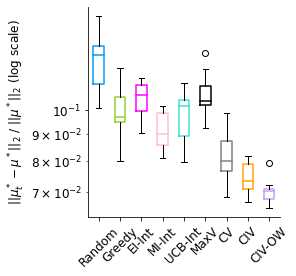

In [7]:
plt.clf()
fig, ax = plt.subplots(1,1,figsize=(4.25,4))
plt.rcParams.update({'font.size': 12})

data = []
for k in ['passive', 'greedy', 'ei', 'mi', 'ucb', 'maxv', 'cv', 'civ', 'civow']:
	data.append([np.array(mu_MSEs[i][k]).mean(axis=0)[-1] for i in range(num_instances)])
bplots = plt.boxplot(data, labels=['Random', 'Greedy', 'EI-Int', 'MI-Int', 'UCB-Int', 'MaxV', 'CV', 'CIV', 'CIV-OW'], patch_artist=False);

# fill with colors
colors = ['#069AF3', '#9ACD32', 'magenta','pink', 'turquoise', 'black', 'grey', 'orange', '#C79FEF']

for patch, color in zip(bplots['boxes'], colors):
	# patch.set_facecolor(color)
	patch.set(color=color, linewidth=1.5)
	
for line, color in zip(bplots['medians'], colors):
	# patch.set_facecolor(color)
	line.set(color=color, linewidth=1.5)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylabel(r'$||\mu_t^*-\mu^*||_2~/~||\mu^*||_2$ (log scale)')
# plt.title(f'time step {opts.T}')
plt.yscale('log')
plt.tight_layout()

# plt.savefig(f'figures/additional_baseline/relative-err-lastround_{DAG_type}-{nnodes}-{a_size}.pdf')

<Figure size 432x288 with 0 Axes>

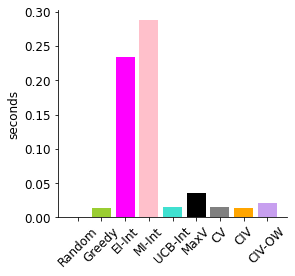

In [8]:
plt.clf()
fig, ax = plt.subplots(1,1,figsize=(4.25,4))
plt.rcParams.update({'font.size': 12})

# fill with colors
colors = ['#069AF3', '#9ACD32', 'magenta','pink', 'turquoise', 'black', 'grey', 'orange', '#C79FEF']

time = []
for k in ['passive', 'greedy', 'ei', 'mi', 'ucb','maxv', 'cv', 'civ', 'civow']:
	time.append(np.average([Times[i][k] for i in range(num_instances)])/(opts.R*opts.T))
bplots = plt.bar(['Random', 'Greedy', 'EI-Int', 'MI-Int','UCB-Int','MaxV', 'CV', 'CIV', 'CIV-OW'], time, color=colors)


# for patch, color in zip(bplots['boxes'], colors):
# 	# patch.set_facecolor(color)
# 	patch.set(color=color, linewidth=1.5)
	
# for line, color in zip(bplots['medians'], colors):
# 	# patch.set_facecolor(color)
# 	line.set(color=color, linewidth=1.5)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylabel(r'seconds')
# plt.title(f'time step {opts.T}')
# plt.yscale('log')
plt.tight_layout()

# plt.savefig(f'figures/additional_baseline/runtime_{DAG_type}-{nnodes}-{a_size}.pdf')